In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import pandas as pd
import random
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [37]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-4-genam-202209')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-4-genam-202209', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='pabs')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_4_amp = np.stack(array_list)

In [38]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-8-genam-202209')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-8-genam-202209', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='pabs')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_8_amp = np.stack(array_list)

In [39]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-16-genam-202210')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-16-genam-202210', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='pabs')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_16_amp = np.stack(array_list)

In [40]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-32-genam-202210')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-32-genam-202210', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='pabs')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_32_amp = np.stack(array_list)

In [41]:
real_data_4_amp = torch.tensor(real_data_4_amp, dtype=torch.float32)
real_data_8_amp = torch.tensor(real_data_8_amp, dtype=torch.float32)
real_data_16_amp = torch.tensor(real_data_16_amp, dtype=torch.float32)
real_data_32_amp = torch.tensor(real_data_32_amp, dtype=torch.float32)

In [42]:
data_min = torch.min(real_data_4_amp)
data_max = torch.max(real_data_4_amp)
real_data_4_amp_normalized = (real_data_4_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_8_amp)
data_max = torch.max(real_data_8_amp)
real_data_8_amp_normalized = (real_data_8_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_16_amp)
data_max = torch.max(real_data_16_amp)
real_data_16_amp_normalized = (real_data_16_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_32_amp)
data_max = torch.max(real_data_32_amp)
real_data_32_amp_normalized = (real_data_32_amp - data_min) / (data_max - data_min)

In [43]:
real_data_4_amp_normalized = real_data_4_amp_normalized.view(1024,100)
real_data_8_amp_normalized = real_data_8_amp_normalized.view(1024,567)
real_data_16_amp_normalized = real_data_16_amp_normalized.view(1024,3468)
real_data_32_amp_normalized = real_data_32_amp_normalized.view(1024,25047)

In [44]:
random_indices = torch.randperm(1024)
real_data_4_amp_normalized = real_data_4_amp_normalized[random_indices]
training_4_amp = real_data_4_amp_normalized[:900, :]
test_4_amp = real_data_4_amp_normalized[900:, :]
train_loader_4 = torch.utils.data.DataLoader(training_4_amp, batch_size=100, shuffle=True)

In [45]:
random_indices = torch.randperm(1024)
real_data_8_amp_normalized = real_data_8_amp_normalized[random_indices]
training_8_amp = real_data_8_amp_normalized[:900, :]
test_8_amp = real_data_8_amp_normalized[900:, :]
train_loader_8 = torch.utils.data.DataLoader(training_8_amp, batch_size=100, shuffle=True)

In [46]:
random_indices = torch.randperm(1024)
real_data_16_amp_normalized = real_data_16_amp_normalized[random_indices]
training_16_amp = real_data_16_amp_normalized[:900, :]
test_16_amp = real_data_16_amp_normalized[900:, :]
train_loader_16 = torch.utils.data.DataLoader(training_16_amp, batch_size=100, shuffle=True)

In [47]:
random_indices = torch.randperm(1024)
real_data_32_amp_normalized = real_data_32_amp_normalized[random_indices]
training_32_amp = real_data_32_amp_normalized[:900, :]
test_32_amp = real_data_32_amp_normalized[900:, :]
train_loader_32 = torch.utils.data.DataLoader(training_32_amp, batch_size=100, shuffle=True)

In [48]:
def compute_cosine_similarity(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("different size")
    vector1 = array1.reshape(-1)
    vector2 = array2.reshape(-1)

    dot_product = np.dot(vector1, vector2)

    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)

    cosine_similarity = dot_product / (norm1 * norm2)

    return cosine_similarity

In [49]:
def compute_ssim_3d(array1, array2, win_size=3):
    if array1.shape != array2.shape:
        raise ValueError("different size")

    ssim_values = []

    for i in range(array1.shape[0]):
        slice1 = array1[i, :, :]
        slice2 = array2[i, :, :]
        ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)
        ssim_values.append(ssim_score)

    mean_ssim = np.mean(ssim_values)
    return mean_ssim

In [50]:
def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x, reduction='sum')

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

In [51]:
class VAE4MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE4MLP, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # For binary data (e.g., images in [0, 1])
        )

    def encode(self, x):
        hidden = self.encoder(x)
        mu = self.fc_mu(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [52]:
input_dim = 100
learning_rate = 1e-2
num_epochs = 1000

In [53]:
input_dim = 3468
learning_rate = 1e-2
num_epochs = 1200
hidden_dim =300
latent_dim = 15
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE4MLP(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
  total_loss = 0
  for data in train_loader_16:
    data = data.to(device)
    reconstructed_x, mu, logvar = model(data)
    loss = vae_loss(reconstructed_x, data, mu, logvar)
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

Epoch 1/1200, Loss: 828966.12109375
Epoch 2/1200, Loss: 236244.29296875
Epoch 3/1200, Loss: 222799.78125
Epoch 4/1200, Loss: 216608.6796875
Epoch 5/1200, Loss: 211582.771484375
Epoch 6/1200, Loss: 209524.134765625
Epoch 7/1200, Loss: 208229.4140625
Epoch 8/1200, Loss: 206956.75
Epoch 9/1200, Loss: 206183.400390625
Epoch 10/1200, Loss: 205972.646484375
Epoch 11/1200, Loss: 206014.705078125
Epoch 12/1200, Loss: 206203.724609375
Epoch 13/1200, Loss: 206064.859375
Epoch 14/1200, Loss: 205846.80078125
Epoch 15/1200, Loss: 206089.53125
Epoch 16/1200, Loss: 205427.095703125
Epoch 17/1200, Loss: 205544.244140625
Epoch 18/1200, Loss: 205302.4140625
Epoch 19/1200, Loss: 205467.328125
Epoch 20/1200, Loss: 205350.951171875
Epoch 21/1200, Loss: 205529.591796875
Epoch 22/1200, Loss: 205451.212890625
Epoch 23/1200, Loss: 205350.373046875
Epoch 24/1200, Loss: 205269.388671875
Epoch 25/1200, Loss: 205106.6953125
Epoch 26/1200, Loss: 205040.546875
Epoch 27/1200, Loss: 204780.388671875
Epoch 28/1200, Los

In [54]:
model.eval()
with torch.no_grad():
  reconstructed_x, mu, logvar = model(training_16_amp)

In [55]:
mu.shape

torch.Size([900, 15])

In [56]:
pip install scikit-learn

In [57]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [58]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(mu)

In [59]:
tsne = TSNE(n_components=2)
reduced_data2 = tsne.fit_transform(mu)

In [60]:
reduced_data2.shape

(900, 2)

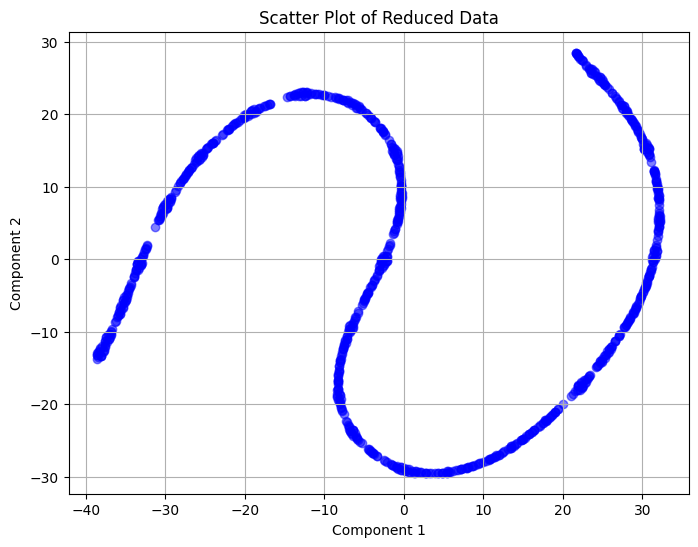

In [62]:
x = reduced_data2[:, 0]
y = reduced_data2[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.title('Scatter Plot of Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()